In [14]:
%matplotlib inline

In [6]:
#Installing required libraries
pip install pdf2image Pillow opencv-python

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Installing Poppler to read, render, or modify PDF documents using pdf2image library
#conda install -c conda-forge poppler

In [1]:
from pdf2image import convert_from_path

In [77]:
mypdf = r'C:\Users\sidde\OneDrive\Documents\IEEE Paper.pdf'
pages = convert_from_path(mypdf, 400, poppler_path=r'C:\Program Files\poppler-0.67.0\bin')
#Saving each page of pdf with name 'Page (page no)'                          
i = 1
for page in pages:
    image_name = "Page_" + str(i) + ".jpg"  
    page.save(image_name, "JPEG")
    i = i+1        

In [6]:
#Importing OpenCV and Pillow t
import cv2
from PIL import Image

In [20]:
#Defining a function to mark rectangles(bounding boxes) over the text
def mark_region(image_path):
    
    image = cv2.imread(image_path)

    # define threshold of regions to ignore
    THRESHOLD_REGION_IGNORE = 40

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x, y, w, h = cv2.boundingRect(c)
        
        if w < THRESHOLD_REGION_IGNORE or h < THRESHOLD_REGION_IGNORE:
            continue
        
        image = cv2.rectangle(image, (x,y), (x+w, y+h), color=(255,0,255), thickness=3)
        line_items_coordinates.append([(x,y), (x+w, y+h)])

    return image, line_items_coordinates

In [15]:
#Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

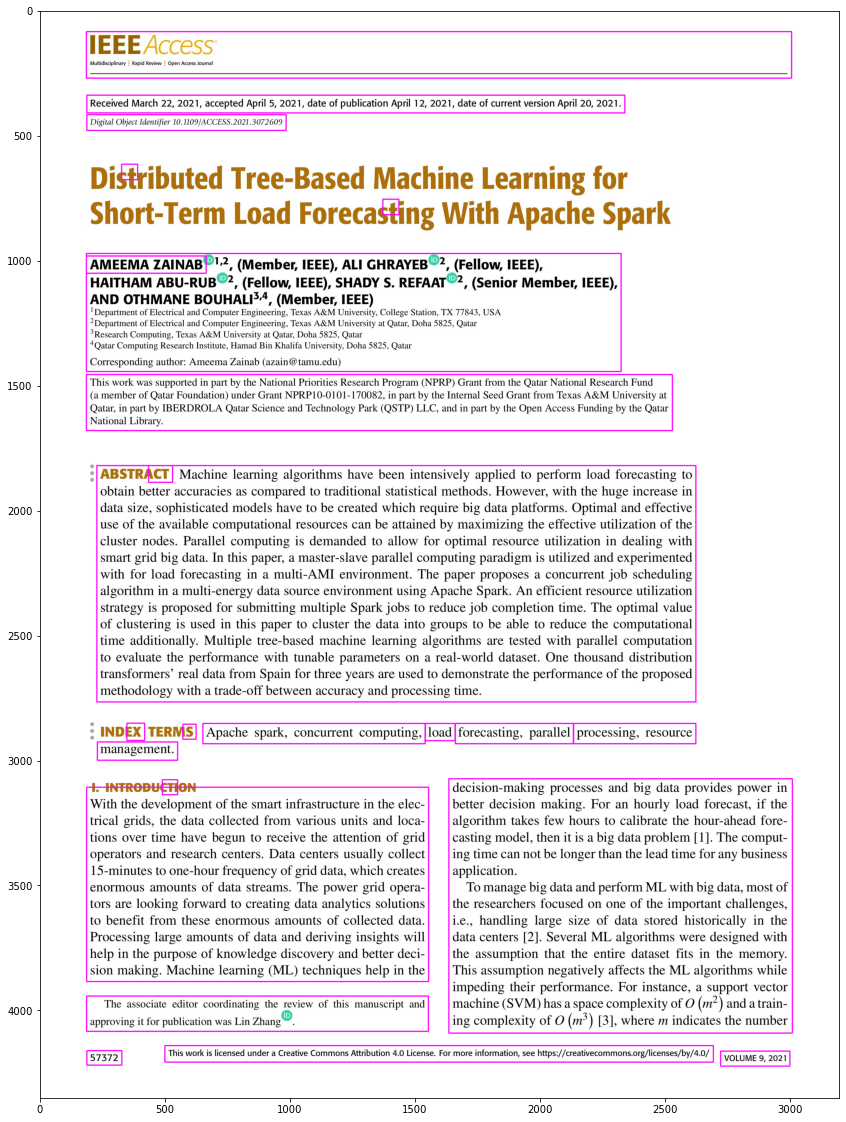

In [78]:
path_im = r'C:\Users\sidde\Page_1.jpg'
image, line_items_coordinates = mark_region(path_im)
#Displaying the selected page of the PDF with the bounded boxes
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.savefig("image-with-regions.png")

In [69]:
line_items_coordinates[0]

[(2722, 4162), (2999, 4222)]

In [23]:
#Pytesseract OCR
import pytesseract

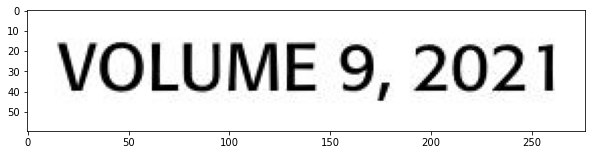

In [70]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# load the original image
image = cv2.imread(r'C:\Users\sidde\Page_1.jpg')
#Displaying one of the bounded boxes
c = line_items_coordinates[0]
img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]] 
plt.figure(figsize=(10,10))
plt.imshow(img)

In [67]:
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

In [68]:
#Using Pytesseract to extract text
text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)

Received March 22, 2021, accepted April 5, 2021, date of publication April 12, 2021, date of current version April 20, 2021.



In [72]:
#Extracting text from all the bounded boxes using Pytesseract and appending to an empty list
pdf_text = []
for i in range(len(line_items_coordinates)):
               c = line_items_coordinates[i]
               img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]] 
               ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
               text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
               pdf_text.append(text)

In [74]:
#Printing the whole page 
for item in reversed(pdf_text):
    print(item)

Multidisciplinary © Rapid Review © Open Access Journal

Received March 22, 2021, accepted April 5, 2021, date of publication April 12, 2021, date of current version April 20, 2021.

Digital Object Identifier 10.1109/ACCESS.2021.3072609



AMEEMA ZAINAB™'2, (Member, IEEE), ALI GHRAYEB 2, (Fellow, IEEE),

HAITHAM ABU-RUB 2, (Fellow, IEEE), SHADY S. REFAAT™2, (Senior Member, IEEE),
AND OTHMANE BOUHALI*“, (Member, IEEE)

‘Department of Electrical and Computer Engineering, Texas A&M University, College Station, TX 77843, USA

? Department of Electrical and Computer Engineering, Texas A&M University at Qatar, Doha 5825, Qatar

Research Computing, Texas A&M University at Qatar, Doha 5825, Qatar

4 Qatar Computing Research Institute, Hamad Bin Khalifa University, Doha 5825, Qatar

Corresponding author: Ameema Zainab (azain @ tamu.edu)

AMEEMA ZAINAB

This work was supported in part by the National Priorities Research Program (NPRP) Grant from the Qatar National Research Fund

(a member of Qata

In [1]:
git init

SyntaxError: invalid syntax (<ipython-input-1-f188d5ac1197>, line 1)